In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pickle
import wind_power_bidding as wpb

In [2]:
# Load the forecast data
with open('InputData/Scenarios.pkl', 'rb') as file:
    data = pickle.load(file)
wind_forecast = data['wind_data_da']
spot_forecast = data['spot_prices']
# spot_forecast = np.ones(np.shape(spot_forecast))
imbalance_forecast = data['imbalance']
n1=20; n2=20; n3=4; n_scenarios = [n1,n2,n3]
print(np.shape(wind_forecast))
print(np.shape(spot_forecast))
print(np.shape(imbalance_forecast))

f_up= 1.25
f_down = 0.85

(24, 20)
(24, 20)
(24, 4)


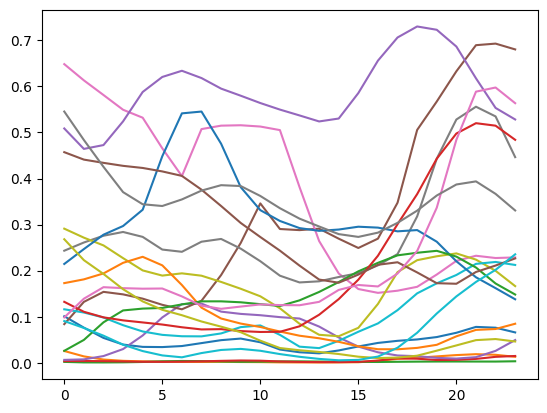

In [3]:
plt.plot(wind_forecast, label='Wind Forecast')

# Run with the one-price scheme (OLD)

In [4]:
"""wind_bids, prob, imbalances, imbalances_up, imbalances_down= wpb.wind_pp_bidding(wind_forecast[:,:n1], spot_forecast[:,:n2], imbalance_forecast[:,:n3], n_scenarios, f_up, f_down, price_scheme='one_price')"""

"wind_bids, prob, imbalances, imbalances_up, imbalances_down= wpb.wind_pp_bidding(wind_forecast[:,:n1], spot_forecast[:,:n2], imbalance_forecast[:,:n3], n_scenarios, f_up, f_down, price_scheme='one_price')"

In [5]:
"""# Visualize the selected wind bids
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(wind_forecast[:,:1], label='Wind Forecast', marker='o')
plt.plot(wind_bids, label='Wind Bids', marker='x')
plt.plot(imbalances_down[:,:1], label='Imbalance Down')
plt.plot(imbalances_up[:,:1], label='Imbalance up', linestyle='--')
plt.legend()
plt.subplot(312)
plt.plot(spot_forecast[:,:n1], label='Spot Prices', marker='o')
plt.subplot(313)
plt.plot(imbalance_forecast[:,:n3], label='Imbalance Prices', marker='x')
"""

"# Visualize the selected wind bids\nplt.figure(figsize=(10, 6))\nplt.subplot(311)\nplt.plot(wind_forecast[:,:1], label='Wind Forecast', marker='o')\nplt.plot(wind_bids, label='Wind Bids', marker='x')\nplt.plot(imbalances_down[:,:1], label='Imbalance Down')\nplt.plot(imbalances_up[:,:1], label='Imbalance up', linestyle='--')\nplt.legend()\nplt.subplot(312)\nplt.plot(spot_forecast[:,:n1], label='Spot Prices', marker='o')\nplt.subplot(313)\nplt.plot(imbalance_forecast[:,:n3], label='Imbalance Prices', marker='x')\n"

In [6]:
"""# Compute the profit over all scenarios
profit = np.zeros((n1, n2, n3))
for i in range(n1):
    for j in range(n2):
        for k in range(n3):
            profit[i, j, k] = wpb.compute_profit(wind_bids, wind_forecast[:, i], spot_forecast[:, j], imbalance_forecast[:, k],  f_down, f_up, 'one_price')

# flatten profit array
profit_flat = profit.flatten()
# Sort the profit array
profit_sorted = np.sort(profit_flat)
# Compute the expected profit
expected_profit = np.mean(profit_sorted)
print("Expected Profit: ", expected_profit)
# Visualize the cumulative distribution function (CDF)
plt.figure(figsize=(10, 6))
plt.hist(profit_sorted, bins=50, cumulative=True, color='blue', alpha=0.7)
plt.title('Cumulative Distribution Function of Profit')"""

'# Compute the profit over all scenarios\nprofit = np.zeros((n1, n2, n3))\nfor i in range(n1):\n    for j in range(n2):\n        for k in range(n3):\n            profit[i, j, k] = wpb.compute_profit(wind_bids, wind_forecast[:, i], spot_forecast[:, j], imbalance_forecast[:, k],  f_down, f_up, \'one_price\')\n\n# flatten profit array\nprofit_flat = profit.flatten()\n# Sort the profit array\nprofit_sorted = np.sort(profit_flat)\n# Compute the expected profit\nexpected_profit = np.mean(profit_sorted)\nprint("Expected Profit: ", expected_profit)\n# Visualize the cumulative distribution function (CDF)\nplt.figure(figsize=(10, 6))\nplt.hist(profit_sorted, bins=50, cumulative=True, color=\'blue\', alpha=0.7)\nplt.title(\'Cumulative Distribution Function of Profit\')'

# Run with the two-price scheme (OLD)

In [7]:
"""wind_bids, prob, imbalances, imbalances_up, imbalances_down= wpb.wind_pp_bidding(wind_forecast[:,:n1], spot_forecast[:,:n2], imbalance_forecast[:,:n3], n_scenarios, f_up, f_down, price_scheme='two_price')"""

"wind_bids, prob, imbalances, imbalances_up, imbalances_down= wpb.wind_pp_bidding(wind_forecast[:,:n1], spot_forecast[:,:n2], imbalance_forecast[:,:n3], n_scenarios, f_up, f_down, price_scheme='two_price')"

In [8]:
"""# Visualize the selected wind bids
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(wind_forecast[:,:1], label='Wind Forecast', marker='o')
plt.plot(wind_bids, label='Wind Bids', marker='x')
plt.plot(imbalances_down[:,:1])
plt.plot(imbalances_up[:,:1], '--')
plt.plot()
plt.subplot(312)
plt.plot(spot_forecast[:,:n1], label='Spot Prices', marker='o')
plt.subplot(313)
plt.plot(imbalance_forecast[:,:n3], label='Imbalance Prices', marker='x')"""

"# Visualize the selected wind bids\nplt.figure(figsize=(10, 6))\nplt.subplot(311)\nplt.plot(wind_forecast[:,:1], label='Wind Forecast', marker='o')\nplt.plot(wind_bids, label='Wind Bids', marker='x')\nplt.plot(imbalances_down[:,:1])\nplt.plot(imbalances_up[:,:1], '--')\nplt.plot()\nplt.subplot(312)\nplt.plot(spot_forecast[:,:n1], label='Spot Prices', marker='o')\nplt.subplot(313)\nplt.plot(imbalance_forecast[:,:n3], label='Imbalance Prices', marker='x')"

In [9]:
"""# Compute the profit over all scenarios
profit = np.zeros((n1, n2, n3))
for i in range(n1):
    for j in range(n2):
        for k in range(n3):
            profit[i, j, k] = wpb.compute_profit(wind_bids, wind_forecast[:, i], spot_forecast[:, j], imbalance_forecast[:, k],  f_down, f_up, 'two_price')

# flatten profit array
profit_flat = profit.flatten()
# Sort the profit array
profit_sorted = np.sort(profit_flat)
# Compute the expected profit
expected_profit = np.mean(profit_sorted)
print("Expected Profit: ", expected_profit)
# Visualize the cumulative distribution function (CDF)
plt.figure(figsize=(10, 6))
plt.hist(profit_sorted, bins=50, cumulative=True, color='blue', alpha=0.7)
plt.title('Cumulative Distribution Function of Profit')"""

'# Compute the profit over all scenarios\nprofit = np.zeros((n1, n2, n3))\nfor i in range(n1):\n    for j in range(n2):\n        for k in range(n3):\n            profit[i, j, k] = wpb.compute_profit(wind_bids, wind_forecast[:, i], spot_forecast[:, j], imbalance_forecast[:, k],  f_down, f_up, \'two_price\')\n\n# flatten profit array\nprofit_flat = profit.flatten()\n# Sort the profit array\nprofit_sorted = np.sort(profit_flat)\n# Compute the expected profit\nexpected_profit = np.mean(profit_sorted)\nprint("Expected Profit: ", expected_profit)\n# Visualize the cumulative distribution function (CDF)\nplt.figure(figsize=(10, 6))\nplt.hist(profit_sorted, bins=50, cumulative=True, color=\'blue\', alpha=0.7)\nplt.title(\'Cumulative Distribution Function of Profit\')'

# 1) One price scheme

In [10]:
# combine scenarios and shuffle them 
import itertools

combined_scenarios = list(itertools.product(range(n1), range(n2), range(n3)))
shuffled_scenarios = np.random.permutation(combined_scenarios)

In [ ]:
# nb_scenarios to consider
n_scenarios = 100
scenarios_id = shuffled_scenarios[:n_scenarios, :] # take the first n_scenarios as the in-sample scenarios
wind_bids, prob, imbalances, imbalances_up, imbalances_down= wpb.wind_pp_bidding_2(wind_forecast[:, scenarios_id[:, 0]], spot_forecast[:, scenarios_id[:, 1]], imbalance_forecast[:, scenarios_id[:, 2]], f_up, f_down, price_scheme='one_price')

/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


Objective value:  404.87750722091096


/opt/homebrew/lib/python3.11/site-packages/mosek/__init__.py:18617: UserWarning: Argument sub in putvarboundlist: Incorrect array format causing data to be copied
  warnings.warn("Argument sub in putvarboundlist: Incorrect array format causing data to be copied");
/opt/homebrew/lib/python3.11/site-packages/mosek/__init__.py:18925: UserWarning: Argument subj in putclist: Incorrect array format causing data to be copied
  warnings.warn("Argument subj in putclist: Incorrect array format causing data to be copied");
/opt/homebrew/lib/python3.11/site-packages/mosek/__init__.py:18349: UserWarning: Argument sub in putconboundlist: Incorrect array format causing data to be copied
  warnings.warn("Argument sub in putconboundlist: Incorrect array format causing data to be copied");


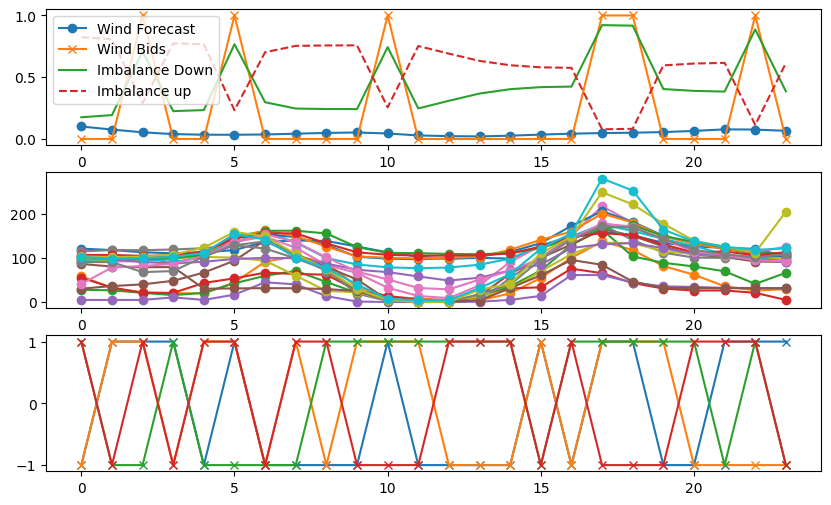

In [12]:
# Visualize the selected wind bids
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(wind_forecast[:,:1], label='Wind Forecast', marker='o')
plt.plot(wind_bids, label='Wind Bids', marker='x')
plt.plot(imbalances_down[:,:1], label='Imbalance Down')
plt.plot(imbalances_up[:,:1], label='Imbalance up', linestyle='--')
plt.legend()
plt.subplot(312)
plt.plot(spot_forecast[:,:n1], label='Spot Prices', marker='o')
plt.subplot(313)
plt.plot(imbalance_forecast[:,:n3], label='Imbalance Prices', marker='x')

Expected Profit:  404.8775072209111


Text(0.5, 1.0, 'Cumulative Distribution Function of Profit')

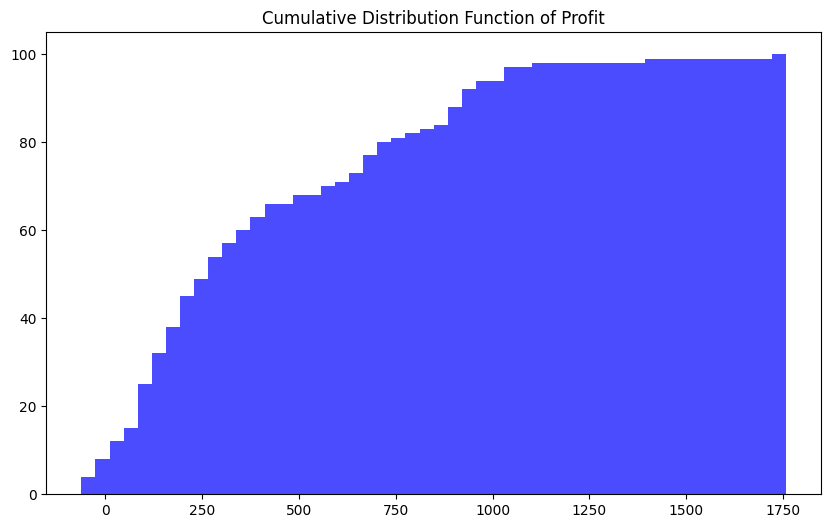

In [13]:
# compute profit of in-sample scenarios
# Compute the profit over all scenarios
profit = np.zeros((n_scenarios, 1))
for i in range(n_scenarios):
        profit[i] = wpb.compute_profit(wind_bids, wind_forecast[:, scenarios_id[i, 0]], spot_forecast[:,scenarios_id[i, 1]], imbalance_forecast[:, scenarios_id[i, 2]], f_down, f_up, 'one_price')

# flatten profit array
profit_flat = profit.flatten()
# Sort the profit array
profit_sorted = np.sort(profit_flat)
# Compute the expected profit
expected_profit = np.mean(profit_sorted)
print("Expected Profit: ", expected_profit)
# Visualize the cumulative distribution function (CDF)
plt.figure(figsize=(10, 6))
plt.hist(profit_sorted, bins=50, cumulative=True, color='blue', alpha=0.7)
plt.title('Cumulative Distribution Function of Profit')

# 2) Two-price scheme

In [14]:
wind_bids, prob, imbalances, imbalances_up, imbalances_down= wpb.wind_pp_bidding_2(wind_forecast[:, scenarios_id[:, 0]], spot_forecast[:, scenarios_id[:, 1]], imbalance_forecast[:, scenarios_id[:, 2]], f_up, f_down, price_scheme='two_price')

Objective value:  341.0067902517113


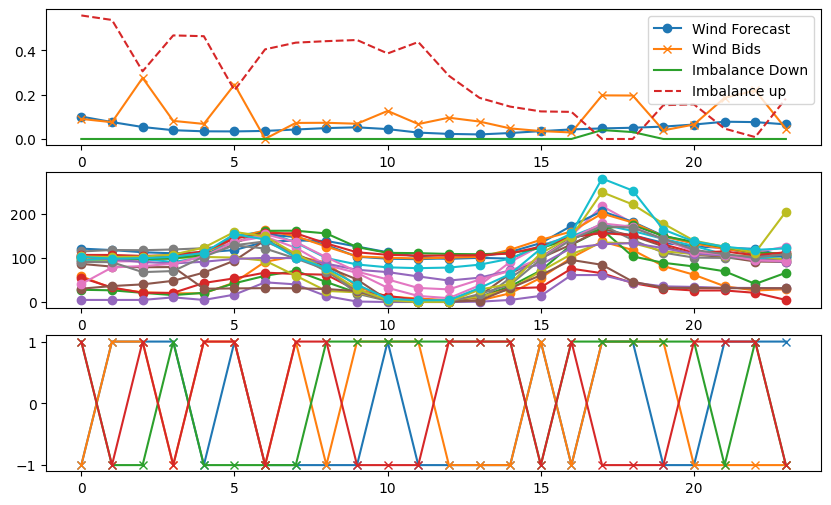

In [15]:
# Visualize the selected wind bids
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(wind_forecast[:,:1], label='Wind Forecast', marker='o')
plt.plot(wind_bids, label='Wind Bids', marker='x')
plt.plot(imbalances_down[:,:1], label='Imbalance Down')
plt.plot(imbalances_up[:,:1], label='Imbalance up', linestyle='--')
plt.legend()
plt.subplot(312)
plt.plot(spot_forecast[:,:n1], label='Spot Prices', marker='o')
plt.subplot(313)
plt.plot(imbalance_forecast[:,:n3], label='Imbalance Prices', marker='x')

Expected Profit:  377.56835516506493


Text(0.5, 1.0, 'Cumulative Distribution Function of Profit')

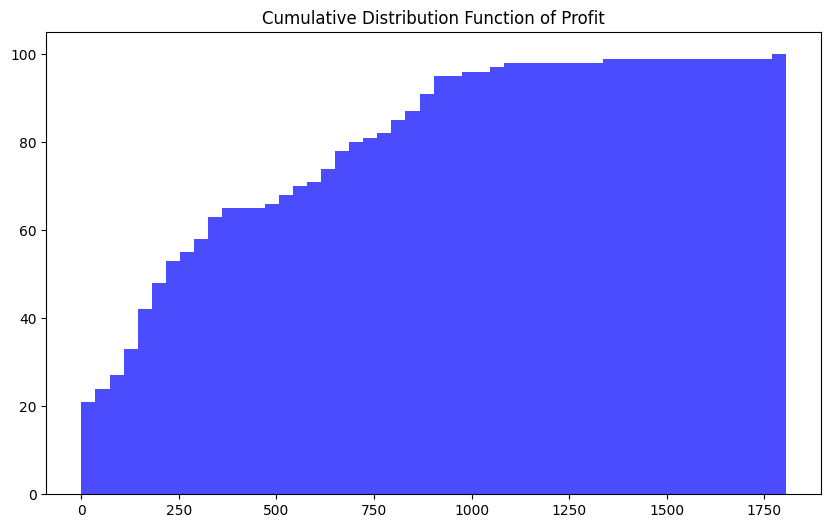

In [16]:
# compute profit of in-sample scenarios
# Compute the profit over all scenarios
profit = np.zeros((n_scenarios, 1))
for i in range(n_scenarios):
        profit[i] = wpb.compute_profit(wind_bids, wind_forecast[:, scenarios_id[i, 0]], spot_forecast[:,scenarios_id[i, 1]], imbalance_forecast[:, scenarios_id[i, 2]], f_down, f_up, 'one_price')

# flatten profit array
profit_flat = profit.flatten()
# Sort the profit array
profit_sorted = np.sort(profit_flat)
# Compute the expected profit
expected_profit = np.mean(profit_sorted)
print("Expected Profit: ", expected_profit)
# Visualize the cumulative distribution function (CDF)
plt.figure(figsize=(10, 6))
plt.hist(profit_sorted, bins=50, cumulative=True, color='blue', alpha=0.7)
plt.title('Cumulative Distribution Function of Profit')

# Ex-Post analysis

In [17]:
def k_fold_cross_validation(wind_forecast, spot_forecast, imbalance_forecast, shuffled_scenarios, f_up, f_down, scheme='one_price', reps=8):

    print("Performing k-fold cross-validation with {} folds...".format(reps))
    print("Price scheme: ", scheme)
    fold_size = len(shuffled_scenarios) // reps # should assert divisibility
    expected_in_profits = np.zeros((reps, 1))
    expected_out_profits = np.zeros((reps, 1))
    for k in range(reps):
        in_sample_scenarios = shuffled_scenarios[k*fold_size:(k+1)*fold_size, :] # since we shuffled scenarios, we can just take the fold_size scenarios from k*fold_size onwards
        out_sample_scenarios = np.delete(shuffled_scenarios, np.s_[k*fold_size:(k+1)*fold_size], axis=0) # delete in-sample scenarios from the shuffled scenarios

        # compute wind bids, only use in-sample scenarios
        wind_bids, _, _, _, _= wpb.wind_pp_bidding_2(wind_forecast[:, in_sample_scenarios[:, 0]], spot_forecast[:, in_sample_scenarios[:, 1]], imbalance_forecast[:, in_sample_scenarios[:, 2]], f_up, f_down, price_scheme=scheme)
        
        # compute profits 
        profits_in_sample = np.zeros((len(in_sample_scenarios), 1))
        for i in range(len(in_sample_scenarios)):
            # compute profits for in-sample scenarios
            profits_in_sample[i] = wpb.compute_profit(wind_bids, wind_forecast[:, in_sample_scenarios[i, 0]], spot_forecast[:, in_sample_scenarios[i, 1]], imbalance_forecast[:, in_sample_scenarios[i, 2]], f_down, f_up, scheme)
        profits_out_sample = np.zeros((len(out_sample_scenarios), 1))
        
        for i in range(len(out_sample_scenarios)):
            # compute profits for out-of-sample scenarios
            profits_out_sample[i] = wpb.compute_profit(wind_bids, wind_forecast[:, out_sample_scenarios[i, 0]], spot_forecast[:, out_sample_scenarios[i, 1]], imbalance_forecast[:, out_sample_scenarios[i, 2]], f_down, f_up, scheme)
        
        expected_in_profits[k] = np.mean(profits_in_sample)
        expected_out_profits[k] = np.mean(profits_out_sample)

    return expected_in_profits, expected_out_profits, profits_in_sample, profits_out_sample

## One Price

In [ ]:
expected_in_profits, expected_out_profits, _, _ = k_fold_cross_validation(wind_forecast, spot_forecast, imbalance_forecast, shuffled_scenarios, f_up, f_down, scheme='one_price', reps=8)

Performing k-fold cross-validation with 8 folds...
Price scheme:  one_price
Objective value:  436.7352004903563
Objective value:  447.7217935578086
Objective value:  458.2259829101032
Objective value:  477.6580559335547
Objective value:  456.3398507371919
Objective value:  392.7081311210311
Objective value:  478.3250398563879


In [ ]:
plt.plot(expected_in_profits, label='In-sample profits', marker='o')
plt.plot(expected_out_profits, label='Out-of-sample profits', marker='x')
plt.legend()

## Two-Price

In [ ]:
expected_in_profits, expected_out_profits, _, _ = k_fold_cross_validation(wind_forecast, spot_forecast, imbalance_forecast, shuffled_scenarios, f_up, f_down, 'two_price', 8)

In [ ]:
plt.plot(expected_in_profits, label='In-sample profits', marker='o')
plt.plot(expected_out_profits, label='Out-of-sample profits', marker='x')
plt.legend()